In [64]:
import pandas as pd
# from nilearn import datasets
from nilearn.image import new_img_like, load_img, get_data, index_img
import numpy as np
import os 
import glob
from nltools.data import Brain_Data

# Prepare data

In [20]:
data_dir = '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration'
data_dir1 = '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas'

folder = 'func'

file_list = glob.glob(os.path.join(data_dir1, sub_num))
# file_list.pop(1) # get rid of subject 3 who does not have exploration data
# file_list.pop(1) # get rid of subject 5 who does not have exploration data
# file_list.pop(1) # get rid of subject 14 who does not have exploration data

# create a dataframe to store data
#colnames = ['sub', 'thalamus', 'retrosplenial', 'precuneus', 'extrastriate', 'early_visual', 'auditory']
#roi_explore = pd.DataFrame(np.zeros((len(file_list), len(colnames))), columns = colnames)
#roi_explore_rand = pd.DataFrame(np.zeros((len(file_list), len(colnames))), columns = colnames)

counter = 0
for i in file_list:
    sub_num = str.split(i, '/')[-1]
    
    # save subject number
    input_subnum = str.split(sub_num,'-')[-1]
    #roi_explore.iloc[counter]['sub'] = int(input_subnum)
    #roi_explore_rand.iloc[counter]['sub'] = int(input_subnum)
    
    # create raw data
    E_file_list = glob.glob(os.path.join(data_dir, 'derivatives', 'nibetaseries_no_atlas',sub_num,folder,'*Ex*_desc-E*.nii.gz'))
    print(E_file_list)
    E = Brain_Data(E_file_list)

    N_file_list = glob.glob(os.path.join(data_dir,  'derivatives', 'nibetaseries_no_atlas',sub_num,folder,'*Ex*_desc-N*.nii.gz'))
    N = Brain_Data(N_file_list)

    W_file_list = glob.glob(os.path.join(data_dir, 'derivatives', 'nibetaseries_no_atlas',sub_num,folder,'*Ex*_desc-W*.nii.gz'))
    W = Brain_Data(W_file_list)

    S_file_list = glob.glob(os.path.join(data_dir, 'derivatives', 'nibetaseries_no_atlas',sub_num,folder,'*Ex*_desc-S*.nii.gz'))
    S = Brain_Data(S_file_list)

    data = E.append(N)
    data = data.append(W)
    data = data.append(S)
    Y = pd.DataFrame(np.hstack([np.zeros(len(E.data)), np.ones(len(N.data)),2*np.ones(len(W.data)), 3*np.ones(len(S.data))]))
    #data.Y = Y
    
    

['/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz', '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz']


In [42]:
demo_file_list = glob.glob(os.path.join(data_dir, 'derivatives', 'nibetaseries_no_atlas',sub_num,folder,'*Ex*_desc-*.nii.gz'))
print(demo_file_list)



['/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz', '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz', '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz', '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz', '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-

In [43]:
demo_img = load_img(demo_file_list)

In [44]:
demo_img.shape

(97, 115, 97, 138)

In [30]:
E1 = load_img(E_file_list)

In [33]:
N1 = load_img(N_file_list)

In [40]:
E1.shape

(97, 115, 97, 43)

In [41]:
N1.shape

(97, 115, 97, 35)

In [89]:
direction = str.split((str.split((str.split(demo_file_list[1], '/')[-1]),'-')[-1]),'_')[0]

In [88]:
direction_num = load_img(demo_file_list[1]).shape[3]

In [109]:
test_x = load_img(demo_file_list[0:2])

In [131]:
test_x2 = test_x.slicer[1:2]

In [133]:
test_x2.shape

(1, 115, 97, 43)

In [112]:
demo_file_list[0:2]

['/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz',
 '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/nibetaseries_no_atlas/sub-002/func/sub-002_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz']

In [113]:
# temp y
E_num = load_img(demo_file_list[0]).shape[3]
N_num = load_img(demo_file_list[1]).shape[3]
y = np.hstack([np.zeros(E_num), np.ones(N_num)])
           

In [101]:
if direction == 'N':
    y = np.zeros(direction_num)
    print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
X = data.data
Y = data.Y.values.ravel()

# Prepare masks

In [4]:
sub_num = "sub-002"

In [7]:
data_dir = '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration'
whole_brain_mask = sub_num+ '_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
whole_brain_mask_path = os.path.join(data_dir, "derivatives","fmriprep",sub_num,"anat",whole_brain_mask)

In [135]:
mask_img = load_img(whole_brain_mask_path)

In [136]:
# .astype() makes a copy.
process_mask = get_data(mask_img).astype(np.int)
picked_slice = 29
process_mask[..., (picked_slice + 1):] = 0
process_mask[..., :picked_slice] = 0
process_mask[:, 30:] = 0
process_mask_img = new_img_like(mask_img, process_mask)

# Searchlight computation

In [139]:
# Make processing parallel
# /!\ As each thread will print its progress, n_jobs > 1 could mess up the
#     information output.
n_jobs = 1

# Define the cross-validation scheme used for validation.
# Here we use a KFold cross-validation on the session, which corresponds to
# splitting the samples in 4 folds and make 4 runs using each fold as a test
# set once and the others as learning sets
from sklearn.model_selection import KFold
cv = KFold(n_splits=4)

import nilearn.decoding
# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = nilearn.decoding.SearchLight(
    mask_img,
    process_mask_img=process_mask_img,
    radius=5.6, n_jobs=n_jobs,
    verbose=1, cv=cv)


In [ ]:
searchlight.fit(test_x, y)

In [ ]:
# feb 24 7:57 pm 43

In [119]:
from nilearn.input_data import NiftiMasker

# For decoding, standardizing is often very important
nifti_masker = NiftiMasker(mask_img=mask_img, 
                           standardize=True, memory='nilearn_cache',
                           memory_level=1)
fmri_masked = nifti_masker.fit_transform(test_x)

from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(fmri_masked, y)
p_values = -np.log10(p_values)
p_values[p_values > 10] = 10
p_unmasked = get_data(nifti_masker.inverse_transform(p_values))

ValueError: zero-size array to reduction operation fmax which has no identity

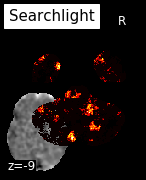

In [121]:
from nilearn import image
mean_fmri = image.mean_img(test_x)

from nilearn.plotting import plot_stat_map, plot_img, show
searchlight_img = new_img_like(mean_fmri, searchlight.scores_)

# Because scores are not a zero-center test statistics, we cannot use
# plot_stat_map
plot_img(searchlight_img, bg_img=mean_fmri,
         title="Searchlight", display_mode="z", cut_coords=[-9],
         vmin=.42, cmap='hot', threshold=.2, black_bg=True)

# F_score results
p_ma = np.ma.array(p_unmasked, mask=np.logical_not(process_mask))
f_score_img = new_img_like(mean_fmri, p_ma)
plot_stat_map(f_score_img, mean_fmri,
              title="F-scores", display_mode="z",
              cut_coords=[-9],
              colorbar=False)


show()

# test

In [45]:
a = np.array([[1, 2], [3, 4]])

In [46]:
b = np.array([[5, 6]])

In [54]:
c = np.concatenate((a, b), axis=0)

In [51]:
c.shape

(3, 2)

In [52]:
c

array([[1, 2],
       [3, 4],
       [5, 6]])

In [55]:
d = np.concatenate((a, b.T), axis=1)

In [57]:
d.shape

(2, 3)